In [2614]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
import statsmodels.api as sm
import seaborn as sns

In [2615]:
pip install scikit-learn

30985.59s - pydevd: Sending message related to process being replaced timed-out after 5 seconds



[notice] A new release of pip available: 22.2.2 -> 23.1.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2616]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso

In [2617]:
df = pd.read_csv('/Users/liu/Desktop/kc_house_data.csv')

In [2618]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [2619]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [2620]:
# Drop irrelevant columns
df = df.drop(['id', 'date','lat', 'long'], axis=1)
df = df.dropna()  # Drop rows with missing values
df = df.drop_duplicates()

In [2621]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
count,2.160700e+04,21607.000000,21607.000000,21607.000000,2.160700e+04,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000
mean,5.401067e+05,3.370852,2.114720,2079.954783,1.511019e+04,1.494122,0.007544,0.234230,3.409497,7.656639,1788.397186,291.557597,1970.997917,84.334058,98077.941315,1986.591799,12770.571991
std,3.671710e+05,0.930058,0.770252,918.526856,4.142579e+04,0.539912,0.086529,0.766185,0.650791,1.175508,828.156250,442.618358,29.370686,401.525908,53.507780,685.436161,27307.553760
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,399.000000,651.000000
25%,3.217250e+05,3.000000,1.750000,1428.500000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.069200e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,2360.000000,10083.500000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,6210.000000,871200.000000


<Axes: >

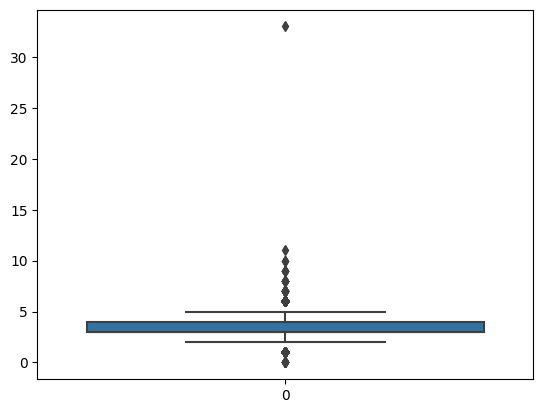

In [2622]:
#Find the outliner
sns.boxplot(df['bedrooms'])

In [2623]:
df[df['bedrooms'] > 30] 

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
15870,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,1330,4700


<Axes: >

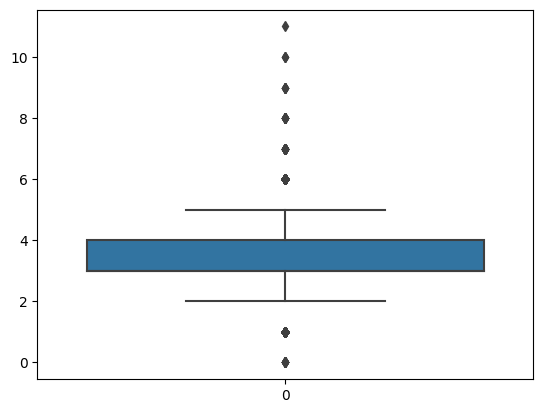

In [2624]:
#drop the outlier
drop_index = [15870]
df.drop(drop_index, axis =0, inplace = True)
sns.boxplot(df['bedrooms'])

<Axes: xlabel='sqft_living', ylabel='Count'>

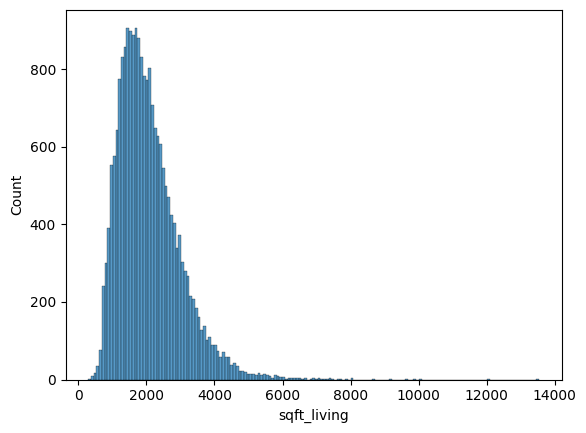

In [2625]:
sns.histplot(df['sqft_living'])

<Axes: xlabel='sqft_living', ylabel='Count'>

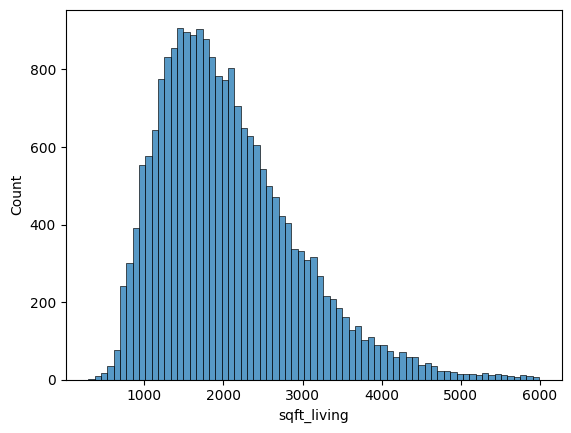

In [2626]:
df[df['sqft_living'] > 6000] 
df = df.drop(df[df['sqft_living'] > 6000].index)
sns.histplot(df['sqft_living'])

<Axes: xlabel='sqft_living15', ylabel='Count'>

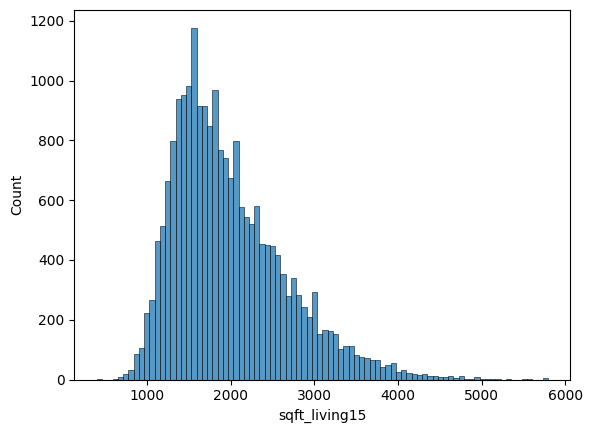

In [2627]:
sns.histplot(df['sqft_living15'])

<Axes: xlabel='sqft_living15', ylabel='Count'>

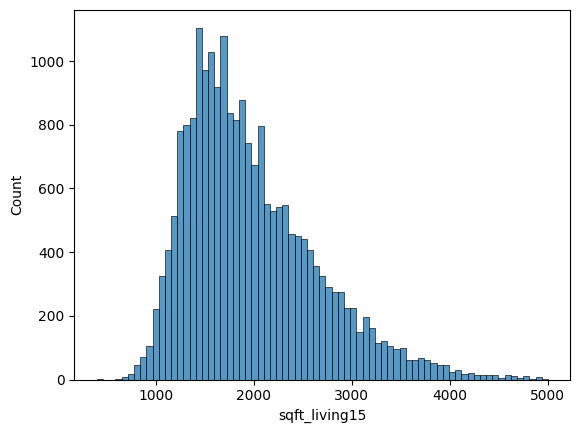

In [2628]:
df[df['sqft_living15'] > 5000] 
df = df.drop(df[df['sqft_living15'] > 5000].index)
sns.histplot(df['sqft_living15'])

In [2629]:
# Feature engineering
df['renovated_age'] = df.apply(lambda row: 2023 - row['yr_renovated'] if row['yr_renovated'] > 0 else 0, axis=1)
df['house_age'] = 2023 - df['yr_built']  # Calculate age of the house
df = df.drop(['yr_built','yr_renovated'], axis=1)
df['price_per_sqft'] = df['price']/df['sqft_living']

In [2630]:
#dummy variables
# Define the bins for grade categories
bins = [0, 6, 8, 13]  # [low, middle, high]
# Define the labels for grade categories
labels = ['low', 'middle', 'high']
# Group 'grade' into categories
df['grade_category'] = pd.cut(df['grade'], bins=bins, labels=labels)
# Create dummy variables for 'grade_category'
grade_dummies = pd.get_dummies(df['grade_category'], prefix='grade')
# Concatenate the dummy variables with the original DataFrame
df = pd.concat([df, grade_dummies], axis=1)
# Drop the original 'grade' and 'grade_category' columns
df = df.drop(['grade', 'grade_category'], axis=1)

# Define the bins for view categories
bins = [-1, 2, 3, 4]  # [low, middle, high]
# Define the labels for view categories
labels = ['low', 'middle', 'high']
# Group 'view' into categories
df['view_category'] = pd.cut(df['view'], bins=bins, labels=labels)
# Create dummy variables for 'view_category'
view_dummies = pd.get_dummies(df['view_category'], prefix='view')
# Concatenate the dummy variables with the original DataFrame
df = pd.concat([df, view_dummies], axis=1)
# Drop the original 'view' and 'view_category' columns
df = df.drop(['view', 'view_category'], axis=1)
# Define the bins for condition categories
bins = [0, 2, 3, 5]  # [low, middle, high]

# Define the labels for condition categories
labels = ['low', 'middle', 'high']
# Group 'condition' into categories
df['condition_category'] = pd.cut(df['condition'], bins=bins, labels=labels)
# Create dummy variables for 'condition_category'
condition_dummies = pd.get_dummies(df['condition_category'], prefix='condition')
# Concatenate the dummy variables with the original DataFrame
df = pd.concat([df, condition_dummies], axis=1)
# Drop the original 'condition' and 'condition_category' columns
df = df.drop(['condition', 'condition_category'], axis=1)

In [2631]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,zipcode,...,price_per_sqft,grade_low,grade_middle,grade_high,view_low,view_middle,view_high,condition_low,condition_middle,condition_high
0,221900.0,3,1.00,1180,5650,1.0,0,1180,0,98178,...,188.050847,False,True,False,True,False,False,False,True,False
1,538000.0,3,2.25,2570,7242,2.0,0,2170,400,98125,...,209.338521,False,True,False,True,False,False,False,True,False
2,180000.0,2,1.00,770,10000,1.0,0,770,0,98028,...,233.766234,True,False,False,True,False,False,False,True,False
3,604000.0,4,3.00,1960,5000,1.0,0,1050,910,98136,...,308.163265,False,True,False,True,False,False,False,False,True
4,510000.0,3,2.00,1680,8080,1.0,0,1680,0,98074,...,303.571429,False,True,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,1530,0,98103,...,235.294118,False,True,False,True,False,False,False,True,False
21609,400000.0,4,2.50,2310,5813,2.0,0,2310,0,98146,...,173.160173,False,True,False,True,False,False,False,True,False
21610,402101.0,2,0.75,1020,1350,2.0,0,1020,0,98144,...,394.216667,False,True,False,True,False,False,False,True,False
21611,400000.0,3,2.50,1600,2388,2.0,0,1600,0,98027,...,250.000000,False,True,False,True,False,False,False,True,False


In [2632]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21521 entries, 0 to 21612
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             21521 non-null  float64
 1   bedrooms          21521 non-null  int64  
 2   bathrooms         21521 non-null  float64
 3   sqft_living       21521 non-null  int64  
 4   sqft_lot          21521 non-null  int64  
 5   floors            21521 non-null  float64
 6   waterfront        21521 non-null  int64  
 7   sqft_above        21521 non-null  int64  
 8   sqft_basement     21521 non-null  int64  
 9   zipcode           21521 non-null  int64  
 10  sqft_living15     21521 non-null  int64  
 11  sqft_lot15        21521 non-null  int64  
 12  renovated_age     21521 non-null  float64
 13  house_age         21521 non-null  int64  
 14  price_per_sqft    21521 non-null  float64
 15  grade_low         21521 non-null  bool   
 16  grade_middle      21521 non-null  bool   
 17

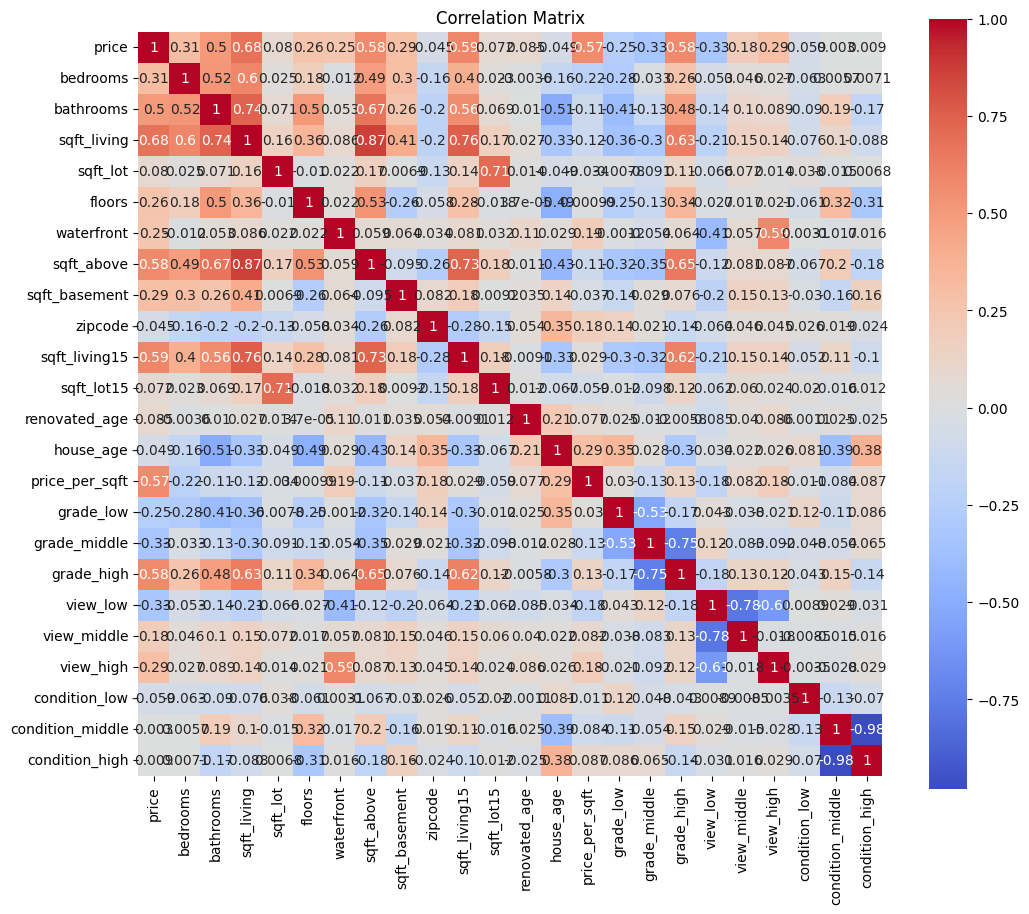

Features with high correlation to price:
['price', 'sqft_living', 'sqft_living15', 'grade_high', 'sqft_above', 'price_per_sqft', 'bathrooms', 'grade_middle', 'view_low', 'bedrooms']


In [2633]:
# Calculate the correlation matrix
corr_matrix = df.corr()
# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()
# Identify features with high correlation to the target variable
target_correlation = corr_matrix['price'].abs().sort_values(ascending=False)
highly_correlated_features = target_correlation[target_correlation > 0.3].index.tolist()
print('Features with high correlation to price:')
print(highly_correlated_features)

In [2647]:
# Split the data into features (X) and target variable (y)
X = df.drop('price', axis=1)
y = df['price']
results = ols("price ~ sqft_living + sqft_living15 + grade_high +sqft_above + price_per_sqft + bathrooms + grade_middle + view_low + bedrooms", data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                 2.001e+04
Date:                Wed, 12 Jul 2023   Prob (F-statistic):               0.00
Time:                        01:42:27   Log-Likelihood:            -2.8028e+05
No. Observations:               21521   AIC:                         5.606e+05
Df Residuals:                   21511   BIC:                         5.607e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -4.819e+05 

In [2648]:
"y_hat = -4.819e+05 + 277.3357sqft_living -8.4409sqft_living15 + 1.971e+04grade_high -5.4023sqft_above +977.8974price_per_sqft + 1.424e+04bathrooms-9301.6133grade_middle-9.877e+04view_low + 462.9754bedrooms' "

"y_hat = -4.819e+05 + 277.3357sqft_living -8.4409sqft_living15 + 1.971e+04grade_high -5.4023sqft_above +977.8974price_per_sqft + 1.424e+04bathrooms-9301.6133grade_middle-9.877e+04view_low + 462.9754bedrooms' "

In [2649]:
pred_vals = results.predict(df[['sqft_living', 'sqft_living15', 'grade_high', 'sqft_above', 'price_per_sqft', 'bathrooms', 'grade_middle', 'view_low', 'bedrooms']])

In [2650]:
pred_vals

0        119196.013399
1        556295.564138
2         91313.850600
3        606565.492423
4        494008.311674
             ...      
21608    327572.118733
21609    418716.287963
21610    478139.488696
21611    376707.091581
21612    328631.774101
Length: 21521, dtype: float64

In [2651]:
res = pd.concat([pred_vals.to_frame().rename(columns={0:'y_hat'}),df['price']], axis=1)

In [2652]:
res

,y_hat,price
0,119196.013399,221900.0
1,556295.564138,538000.0
2,91313.850600,180000.0
3,606565.492423,604000.0
4,494008.311674,510000.0
...,...,...
21608,327572.118733,360000.0
21609,418716.287963,400000.0
21610,478139.488696,402101.0
21611,376707.091581,400000.0


In [2653]:
res['error'] = res['y_hat'] - res['price']

In [2654]:
res.head(1)

,y_hat,price,error
0,119196.013399,221900.0,-102703.986601


In [2655]:
res['sq_error'] = res['error']**2

In [2656]:
np.sqrt(res['sq_error'].mean())

109613.71334871025

In [2657]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,renovated_age,house_age,price_per_sqft
count,2.152100e+04,21521.000000,21521.000000,21521.000000,2.152100e+04,21521.000000,21521.000000,21521.000000,21521.000000,21521.00000,21521.000000,21521.000000,21521.000000,21521.000000,21521.000000
mean,5.325408e+05,3.363691,2.104758,2061.661447,1.489234e+04,1.492217,0.007202,1774.324195,287.337252,98078.06036,1978.468519,12609.299614,1.144371,52.076716,263.789610
std,3.355618e+05,0.902969,0.751291,867.486737,4.073389e+04,0.539320,0.084562,794.264640,432.819082,53.49744,670.317674,26394.511510,6.323175,29.355319,109.721309
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,290.000000,0.000000,98001.00000,399.000000,651.000000,0.000000,8.000000,87.588235
25%,3.200000e+05,3.000000,1.500000,1420.000000,5.040000e+03,1.000000,0.000000,1190.000000,0.000000,98033.00000,1480.000000,5100.000000,0.000000,27.000000,182.142857
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.600000e+03,1.500000,0.000000,1560.000000,0.000000,98065.00000,1840.000000,7619.000000,0.000000,48.000000,244.444444
75%,6.400000e+05,4.000000,2.500000,2540.000000,1.060300e+04,2.000000,0.000000,2200.000000,560.000000,98118.00000,2360.000000,10050.000000,0.000000,72.000000,318.023256
max,3.850000e+06,11.000000,7.500000,5990.000000,1.651359e+06,3.500000,1.000000,5990.000000,2850.000000,98199.00000,5000.000000,871200.000000,89.000000,123.000000,810.138889


(array([1.1000e+01, 1.0000e+01, 2.8000e+01, 5.8000e+01, 1.3000e+02,
        1.6770e+03, 1.7996e+04, 1.4460e+03, 1.4900e+02, 1.6000e+01]),
 array([-1385119.69416944, -1168728.80502143,  -952337.91587342,
         -735947.02672541,  -519556.13757739,  -303165.24842938,
          -86774.35928137,   129616.52986664,   346007.41901465,
          562398.30816266,   778789.19731067]),
 <BarContainer object of 10 artists>)

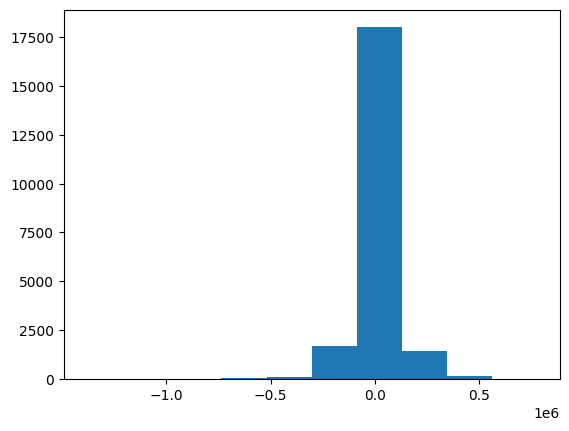

In [2658]:
plt.hist(res['error'])

(array([1.0906e+04, 8.0290e+03, 1.6900e+03, 5.0300e+02, 2.1500e+02,
        8.2000e+01, 5.0000e+01, 2.5000e+01, 1.2000e+01, 9.0000e+00]),
 array([  75000.,  452500.,  830000., 1207500., 1585000., 1962500.,
        2340000., 2717500., 3095000., 3472500., 3850000.]),
 <BarContainer object of 10 artists>)

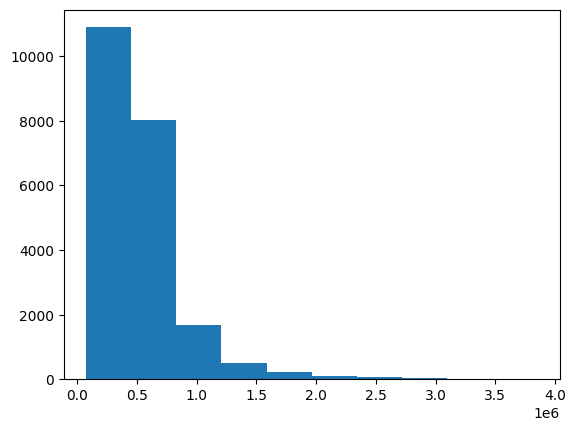

In [2663]:
plt.hist(df['price'])

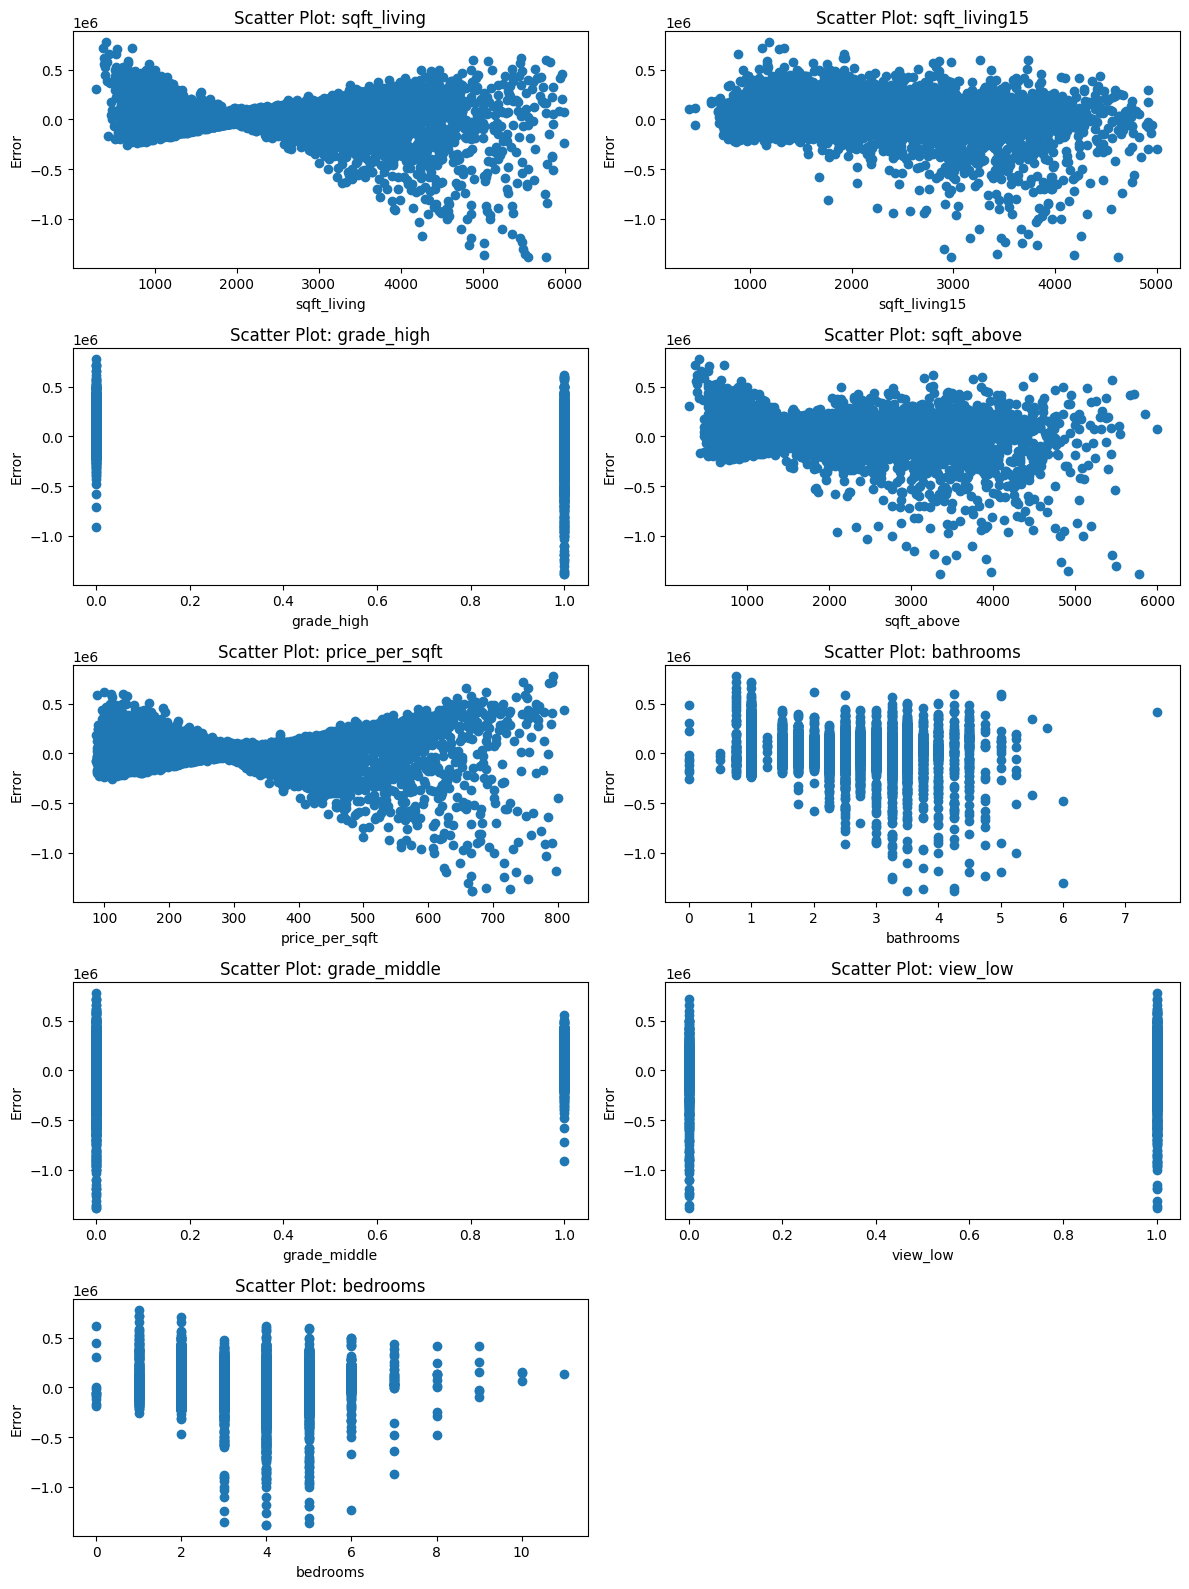

In [2669]:
# Select the variables and error column
variables = ['sqft_living', 'sqft_living15', 'grade_high', 'sqft_above', 'price_per_sqft', 'bathrooms', 'grade_middle', 'view_low', 'bedrooms']
error = res['error']

# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 16))

# Flatten the axes array
axes = axes.flatten()

# Create scatter plots for each variable
for i, var in enumerate(variables):
    ax = axes[i]
    ax.scatter(df[var], error)
    ax.set_xlabel(var)
    ax.set_ylabel('Error')
    ax.set_title(f'Scatter Plot: {var}')

# Remove empty subplots
if len(variables) < len(axes):
    for j in range(len(variables), len(axes)):
        fig.delaxes(axes[j])

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()
plt.show()

((array([-3.9960253 , -3.78075059, -3.66299114, ...,  3.66299114,
          3.78075059,  3.9960253 ]),
  array([-1385119.69416944, -1383993.8749523 , -1361696.82706558, ...,
           718998.87689517,   723204.77136139,   778789.19731067])),
 (97137.51166619343, 6.264784786208004e-08, 0.8860219281769791))

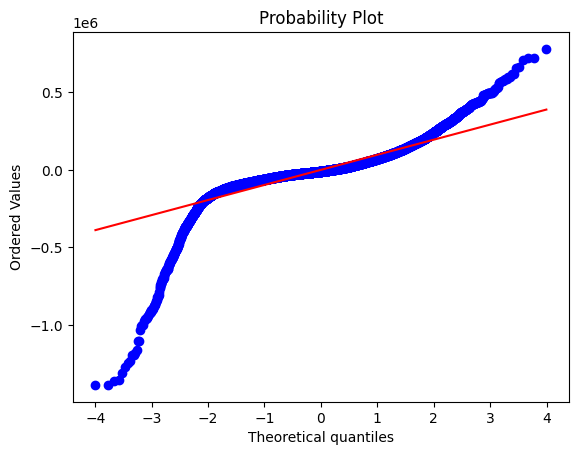

In [2670]:
import scipy.stats as stats
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(res['error'], dist='norm', plot=ax)

In [2671]:
infl = results.get_influence()
print(infl.summary_frame())

       dfb_Intercept  dfb_grade_high[T.True]  dfb_grade_middle[T.True]   
0           0.005816                0.007148                  0.007069  \
1          -0.000386                0.000527                 -0.000319   
2           0.004119               -0.010644                 -0.014549   
3           0.000096               -0.000002                  0.000004   
4          -0.000138               -0.000042                  0.000444   
...              ...                     ...                       ...   
21608       0.000525                0.000281                  0.000659   
21609       0.000034                0.000506                 -0.000141   
21610      -0.002612               -0.004871                 -0.006025   
21611       0.000376                0.000155                  0.000482   
21612      -0.000211               -0.000263                 -0.000296   

       dfb_view_low[T.True]  dfb_sqft_living  dfb_sqft_living15   
0                 -0.001786        -0.002254

In [2672]:
infl.summary_frame()

,dfb_Intercept,dfb_grade_high[T.True],dfb_grade_middle[T.True],dfb_view_low[T.True],dfb_sqft_living,dfb_sqft_living15,dfb_sqft_above,dfb_price_per_sqft,dfb_bathrooms,dfb_bedrooms,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.005816,0.007148,0.007069,-0.001786,-0.002254,-0.002411,0.002039,-0.005677,-0.008748,0.001905,2.295721e-05,0.936868,0.000261,0.015152,0.936865,0.015152
1,-0.000386,0.000527,-0.000319,-0.000214,-0.001472,0.001358,-0.000461,0.000121,0.000312,0.001375,7.351708e-07,-0.166893,0.000264,-0.002711,-0.166889,-0.002711
2,0.004119,-0.010644,-0.014549,0.000963,-0.007300,0.020727,-0.004233,-0.005858,0.001103,-0.002565,7.447907e-05,0.809351,0.001136,0.027291,0.809344,0.027291
3,0.000096,-0.000002,0.000004,-0.000056,-0.000081,0.000147,0.000233,-0.000116,-0.000300,-0.000087,2.407717e-08,-0.023405,0.000439,-0.000491,-0.023404,-0.000491
4,-0.000138,-0.000042,0.000444,0.000081,-0.000468,-0.000008,0.000591,0.000409,0.000169,-0.000215,2.145453e-07,0.145865,0.000101,0.001465,0.145861,0.001465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,0.000525,0.000281,0.000659,-0.000195,-0.001802,-0.000703,0.000827,-0.000525,0.002725,-0.000699,1.660237e-06,0.295797,0.000190,0.004075,0.295791,0.004075
21609,0.000034,0.000506,-0.000141,0.000143,0.000536,0.000675,-0.001342,0.000415,-0.000309,-0.000463,5.427774e-07,-0.170724,0.000186,-0.002330,-0.170720,-0.002330
21610,-0.002612,-0.004871,-0.006025,-0.000369,-0.002245,0.005862,-0.002010,-0.004576,0.007136,0.003306,1.955624e-05,-0.693675,0.000406,-0.013984,-0.693666,-0.013984
21611,0.000376,0.000155,0.000482,-0.000118,-0.000991,-0.001097,0.000800,-0.000062,0.001828,-0.000572,8.846264e-07,0.212471,0.000196,0.002974,0.212467,0.002974


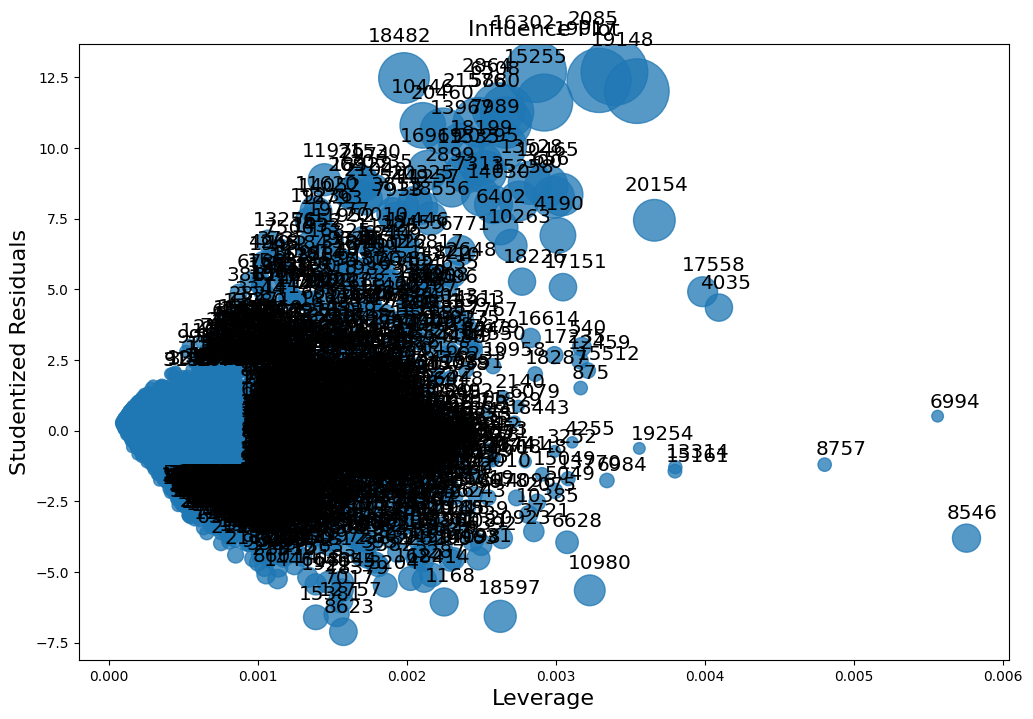

In [2673]:
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(results, ax=ax, criterion='cooks')

In [2674]:
res

,y_hat,price,error,sq_error
0,119196.013399,221900.0,-102703.986601,1.054811e+10
1,556295.564138,538000.0,18295.564138,3.347277e+08
2,91313.850600,180000.0,-88686.149400,7.865233e+09
3,606565.492423,604000.0,2565.492423,6.581751e+06
4,494008.311674,510000.0,-15991.688326,2.557341e+08
...,...,...,...,...
21608,327572.118733,360000.0,-32427.881267,1.051567e+09
21609,418716.287963,400000.0,18716.287963,3.502994e+08
21610,478139.488696,402101.0,76038.488696,5.781852e+09
21611,376707.091581,400000.0,-23292.908419,5.425596e+08


In [2675]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,renovated_age,house_age,price_per_sqft
count,2.152100e+04,21521.000000,21521.000000,21521.000000,2.152100e+04,21521.000000,21521.000000,21521.000000,21521.000000,21521.00000,21521.000000,21521.000000,21521.000000,21521.000000,21521.000000
mean,5.325408e+05,3.363691,2.104758,2061.661447,1.489234e+04,1.492217,0.007202,1774.324195,287.337252,98078.06036,1978.468519,12609.299614,1.144371,52.076716,263.789610
std,3.355618e+05,0.902969,0.751291,867.486737,4.073389e+04,0.539320,0.084562,794.264640,432.819082,53.49744,670.317674,26394.511510,6.323175,29.355319,109.721309
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,290.000000,0.000000,98001.00000,399.000000,651.000000,0.000000,8.000000,87.588235
25%,3.200000e+05,3.000000,1.500000,1420.000000,5.040000e+03,1.000000,0.000000,1190.000000,0.000000,98033.00000,1480.000000,5100.000000,0.000000,27.000000,182.142857
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.600000e+03,1.500000,0.000000,1560.000000,0.000000,98065.00000,1840.000000,7619.000000,0.000000,48.000000,244.444444
75%,6.400000e+05,4.000000,2.500000,2540.000000,1.060300e+04,2.000000,0.000000,2200.000000,560.000000,98118.00000,2360.000000,10050.000000,0.000000,72.000000,318.023256
max,3.850000e+06,11.000000,7.500000,5990.000000,1.651359e+06,3.500000,1.000000,5990.000000,2850.000000,98199.00000,5000.000000,871200.000000,89.000000,123.000000,810.138889


In [2676]:
df.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,sqft_above,sqft_basement,zipcode,...,price_per_sqft,grade_low,grade_middle,grade_high,view_low,view_middle,view_high,condition_low,condition_middle,condition_high
0,221900.0,3,1.00,1180,5650,1.0,0,1180,0,98178,...,188.050847,False,True,False,True,False,False,False,True,False
1,538000.0,3,2.25,2570,7242,2.0,0,2170,400,98125,...,209.338521,False,True,False,True,False,False,False,True,False


In [2693]:
# separate features and target
categorical_features = ['grade_high', 'grade_middle', 'view_low']
numerical_features = ['sqft_living', 'sqft_living15','sqft_above', 'bathrooms','price_per_sqft','bedrooms']
target = 'price'

In [2694]:
# split data in train / test
X_train, X_test, y_train, y_test = train_test_split(df[categorical_features + numerical_features]
                                                    ,df[target],
                                                    test_size = 0.3, random_state=1234)

In [2695]:
# define transformers
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])

In [2696]:
# building processor
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, categorical_features),
                                                 ('num', num_transformer, numerical_features)])

In [2697]:
from sklearn.metrics import mean_squared_error, r2_score

In [2698]:
linear_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [2699]:
linear_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['grade_high', 'grade_middle',
                                                   'view_low']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['sqft_living',
                                                   'sqft_living15',
                                                   'sqft_above', 'bathrooms',
                                                   'price_per_sqft',
                                                   'bedrooms'])])),
                ('regressor', LinearRegression())])

In [2700]:
pred = linear_regression.predict(X_test)
pred
print(np.sqrt(mean_squared_error(pred,y_test)))
print(r2_score(pred,y_test))

112183.37365912
0.8760114264526354


In [2701]:
ridge_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=3.0))
])

In [2702]:
ridge_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['grade_high', 'grade_middle',
                                                   'view_low']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['sqft_living',
                                                   'sqft_living15',
                                                   'sqft_above', 'bathrooms',
                                                   'price_per_sqft',
                                                   'bedrooms'])])),
                ('regressor', Ridge(alpha=3.0))])

In [2703]:
pred_ridge = ridge_regression.predict(X_test)
pred
print(np.sqrt(mean_squared_error(pred_ridge,y_test)))
print(r2_score(pred_ridge,y_test))

112211.54797828682
0.8758102465420468


In [2704]:
lasso_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=1.0))
])

In [2705]:
lasso_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['grade_high', 'grade_middle',
                                                   'view_low']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['sqft_living',
                                                   'sqft_living15',
                                                   'sqft_above', 'bathrooms',
                                                   'price_per_sqft',
                                                   'bedrooms'])])),
                ('regressor', Lasso())])

In [2706]:
lasso_pred = lasso_regression.predict(X_test)
print(np.sqrt(mean_squared_error(lasso_pred, y_test)))
print(r2_score(lasso_pred,y_test))

112206.91388005733
0.8758753612411392


In [2707]:
elasticnet_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=1.0, l1_ratio=0.8))
])

In [2708]:
elasticnet_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['grade_high', 'grade_middle',
                                                   'view_low']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['sqft_living',
                                                   'sqft_living15',
                                                   'sqft_above', 'bathrooms',
                                                   'price_per_sqft',
                                                   'bedrooms'])])),
                ('regressor', ElasticNet(l1_ratio=0.8))])

In [2709]:
elasticnet_pred = elasticnet_regression.predict(X_test)
print(np.sqrt(mean_squared_error(elasticnet_pred, y_test)))
print(r2_score(elasticnet_pred,y_test))

130800.77485337517
0.7753015673786215


Q1

I build a OLS regression model to predict the price of a house.

Before building the model: 

First, I drop irrelevant columns('id','date','lat' and 'long'), than drop duplicates to ensure there is no duplicates, then drop outliers in order to reduce errors.

Then, I transform the data, using feature engineering and creating dummy variables.

'renovated_age' is the variable than whether the house is renovated, if renovated it shows the year from renovated to current, if not it shows 0.'house_age' is age of the house.'price_per_sqft' is the unit price of every house.

dummy variables I created are grade, view, condition (change them to high middle and low level) => grade_high, grade_middle, grade_low, view_high, view_middle, view_low condition_high, condition_middle, condition_low. drop the origanial variables.

Than I use heatmap of the correlation matrix and pick variables correlation > 0.3(correalation from 0.3 to 0.5 is medium correlated, 0.5 to 1.0 are strongly correlated).
Using these variables(sqft_living', 'sqft_living15', 'grade_high', 'sqft_above', 'price_per_sqft', 'bathrooms', 'grade_middle', 'view_low' and 'bedrooms') to run ols regression. Get coeffs,then predict the model R-square is 0.893, the model fit well to the data. As the scatter plots for each variable and error are proper. (That why I choose this model)






Q2

RMSE, and R-squared are the tools I use to evaluate the model.  A lower RMSE indicate better performance, while a higher R-squared value (closer to 1) indicates a better fit of the model to the data.

For OLS, RMSE is 112183.37365912 and R-square is 0.8760114264526354.

For LASSO, RMSE is 112206.91388005733 and R-square is 0.8758753612411392.

For Ridge, RMSE is 112211.54797828682 and R-square is 0.8758102465420468.

For Elastic Net, RMSE is 130800.77485337517 and R-square is 0.7753015673786215.

So, from the from OLS, LASSO, Ridge and Elastic Net. OLS is the the best model I can build.

Q3

The main divers of house prices in King City are 'sqft_living', 'sqft_living15', 'grade_high', 'sqft_above', 'price_per_sqft', 'bathrooms', 'grade_middle', 'view_low' and 'bedrooms'.

From the OLS model I get:

price = -4.819e+05 + 277.3357sqft_living -8.4409sqft_living15 + 1.971e+04grade_high -5.4023sqft_above +977.8974price_per_sqft + 1.424e+04bathrooms-9301.6133grade_middle-9.877e+04view_low + 462.9754bedrooms

If Size of living area in square feet increase 1 unit, house price will increase 277.3557 units.

If average size of interior housing living space for the closest 15 houses, in square feet increase 1 unit, house price will decrease 8.4409sqft_living units.

If Square feet above ground increase 1 unit, house price will decrease 5.4023 units.

If price per squre feet of living area increase 1 unit, house price will increase 977.8974 units.

If there is 1 more bathroom, house price will increase 1.424e+04 units.

If there is 1 more bedroom, house pring will increase 462.975 units.

If the house with high grade in quality(grade_high), there will be a 1.971e+04 unit increase in house price.

If the house with middle grade in quality(grade_middle), there will be a 9301.6133 unit decrease in house price.

If the house with bad view of the property(view_low), there will be a 9.877e+04 unit decrease in house price.

